## Capítulo 7. Introducción a la Inteligencia Artificial y el Aprendizaje Automático para Economía

### 7.3 Introducción a la Biblioteca scikit-learn (sklearn)

En el capítulo 6 vimos algunos ejemplos de regresión lineal utilizando librerías como “statsmodels” y “scipy” para un análisis econométrico clásico. Con esto, pudimos realizar una regresión lineal OLS (mínimos cuadrados ordinarios) y obtener estadísticas detalladas (valores p, errores estándar etc.), lo cual es fundamental para interpretaciones teóricas y pruebas de hipótesis, aspectos clave en la investigación económica tradicional. Sin embargo, cuando el objetivo se desplaza hacia la predicción, la automatización o la aplicación práctica de modelos ML, la librería “scikit-learn” ofrece ventajas significativas.  

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



# Generar datos ficticios: PIB per cápita (miles de dólares) y Patentes (miles)

np.random.seed(42)



n = 50
años = list(range(1975, 2025))

patentes = 0.5 + 0.05 * np.arange(n) + np.random.normal(0, 0.2, n)
patentes = np.round(np.clip(patentes, 0.5, 3.0), 2)

pib_base = 10 + 0.4 * np.arange(n)
pib_noise = np.random.normal(0, 1.5, n)
pib_per_capita = pib_base + 3 * patentes + pib_noise
pib_per_capita = np.round(np.clip(pib_per_capita, 10, 30), 2)


# Crear DataFrame

data = pd.DataFrame({ 'Año': años, 'PIB_per_capita': pib_per_capita, 'Patentes': patentes })


# Variables

X = data[['Patentes']] # sklearn requiere X en 2D
y = data['PIB_per_capita']


# Crear y ajustar modelo

model = LinearRegression()
model.fit(X, y)


# Predicciones

y_pred = model.predict(X)
print(y_pred)

[14.70704729 14.05177739 15.77186087 17.57385308 15.11659097 15.52613466
 18.96630161 17.98339676 16.42713076 18.47484918 17.24621813 17.65576182
 19.21202782 16.09949581 16.83667445 19.13011908 18.80248413 21.34165498
 19.78538898 19.37584529 24.45418698 22.07883361 22.97982972 21.01402003
 22.81601224 24.29036951 22.65219477 25.6009093  24.37227824 25.27327435
 25.19136561 29.61443741 26.99335782 25.68281803 29.12298498 26.25617919
 28.95916751 25.84663551 27.23908403 30.18779856 31.49833835 30.9249772
 30.9249772  31.00688593 29.45061993 31.17070341 31.98979078 34.36514415
 34.11941794 31.08879467]


Para el entrenamiento del modelo, primero, creamos una "instancia" vacía del algoritmo que queremos usar (model = LinearRegression()), posteriormnete, utilizamos el método “.fit()”, el cual toma los datos “X” e “y”, y ejecuta el algoritmo OLS para encontrar los parámetros (coeficientes) óptimos que mejor se ajustan a ellos. Usamos el modelo ya entrenado para hacer predicciones. El método “.predict()” toma un conjunto de datos con la misma estructura que “X” original y devuelve las predicciones de “y”.



Usamos el siguiente código para la evaluación haciendo uso de “scikit-learn.metrics”. Aquí calculamos el Error Cuadrático Medio (MSE) y el R-cuadrado para ver qué tan bien se ajusta el modelo a los datos.  

In [4]:
# Evaluación

print(f"Intercepto: {model.intercept_:.2f}")
print(f"Pendiente: {model.coef_[0]:.2f}")
print(f"R^2 Score: {r2_score(y, y_pred):.4f}")
print(f"Error cuadrático medio: {mean_squared_error(y, y_pred):.4f}")

Intercepto: 9.79
Pendiente: 8.19
R^2 Score: 0.8722
Error cuadrático medio: 4.9357


Usamos el siguiente código para la visualización  

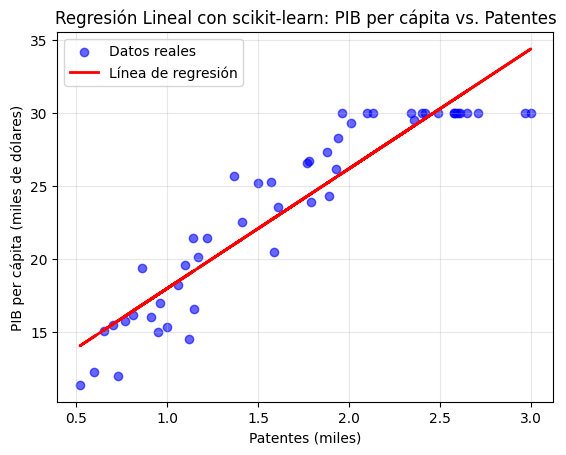

In [5]:
# Visualizar

plt.scatter(X, y, color='blue', alpha=0.6, label='Datos reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.title('Regresión Lineal con scikit-learn: PIB per cápita vs. Patentes')
plt.xlabel('Patentes (miles)')
plt.ylabel('PIB per cápita (miles de dólares)')
plt.legend()
plt.grid(True, alpha=0.3)

### Ejemplo: LASSO con scikit-learn

En este ejemplo, extenderemos nuestro caso anterior, modelando el PIB per cápita no solo en función de las patentes, sino también de la inversión en I+D. Esto nos permitirá ver cómo Lasso maneja múltiples predictores.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np


np.random.seed(42)


# 1. Generación y Preparación de Datos

n = 50
años = list(range(1975, 2025))

patentes = 0.5 + 0.05 * np.arange(n) + np.random.normal(0, 0.2, n)
patentes = np.round(np.clip(patentes, 0.5, 3.0), 2)

inversion_id = 100 + 5 * np.arange(n) + np.random.normal(0, 20, n)
inversion_id = np.round(np.clip(inversion_id, 100, 400), 2)

pib_base = 10 + 0.4 * np.arange(n)
pib_noise = np.random.normal(0, 1.5, n)
pib_per_capita = pib_base + 2 * patentes + 0.02 * inversion_id + pib_noise
pib_per_capita = np.round(np.clip(pib_per_capita, 10, 30), 2)


# Crear DataFrame

data = pd.DataFrame({ 'Año': años, 'PIB_per_capita': pib_per_capita, 'Patentes': patentes, 'Inversion_ID': inversion_id })


# Variables

X = data[['Patentes', 'Inversion_ID']]
y = data['PIB_per_capita']


# 2. Estandarización de las Variables

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 3. Creación y Entrenamiento del Modelo Lasso

model_lasso = Lasso(alpha=0.1) # alpha controla la penalización
model_lasso.fit(X_scaled, y)


# 4. Inspección y Evaluación del Modelo

y_pred = model_lasso.predict(X_scaled)
print(y_pred)

[16.8569922  16.3382424  17.04720871 18.83487563 18.33590248 18.62021152
 18.87117262 19.06469274 19.10669862 20.63684395 19.20599537 19.79192876
 19.91838736 18.7586784  20.7959017  22.35019498 21.31104825 23.37492816
 22.4326256  21.68321643 24.74070872 24.85648728 24.21169123 24.82168789
 22.54510113 25.98598312 24.9385435  26.04953542 26.03509325 25.00233002
 26.5173685  28.97475683 28.94665869 27.06606917 28.45330212 27.69880087
 30.09268364 28.55153117 28.65805368 30.86617535 31.27855275 31.90297288
 30.81275055 31.32580958 30.82673362 30.90520529 32.78508339 33.92914288
 33.82325703 32.58218457]


Una vez que hemos estandarizado los datos, creamos una instancia del modelo Lasso “model_lasso = Lasso(alpha=0.1)”, el argumento alpha es el hiperparámetro de regularización.

    Un alpha más grande significa una penalización más fuerte, lo que forzará a más coeficientes a ser exactamente cero.

    Un alpha más pequeño significa una penalización más débil. alpha=0 sería equivalente a una regresión OLS normal.



Finalmente, entrenaos el modelo haciendo uso de “model_lasso.fit(X_scaled, y)”. Una vez que el modelo esta entrenado podemos proceder a su evaluación, el siguiente código muestra este proceso.

In [8]:
# Evaluación

print("Resultados de LASSO:")

print(f"Intercepto: {model_lasso.intercept_:.2f}")

print(f"Coeficientes: {np.round(model_lasso.coef_, 2)}")

print(f"R^2 Score: {r2_score(y, y_pred):.4f}")
print(f"Error cuadrático medio: {mean_squared_error(y, y_pred):.4f}")

Resultados de LASSO:
Intercepto: 24.97
Coeficientes: [2.39 2.77]
R^2 Score: 0.8087
Error cuadrático medio: 6.3810


Dado que nuestro modelo ahora tiene dos predictores, no podemos visualizarlo completamente en un gráfico 2D. Lo que hacemos es graficar la relación contra una de las variables originales (Patentes) y superponer los valores predichos por el modelo, el siguiente código realiza este proceso.  

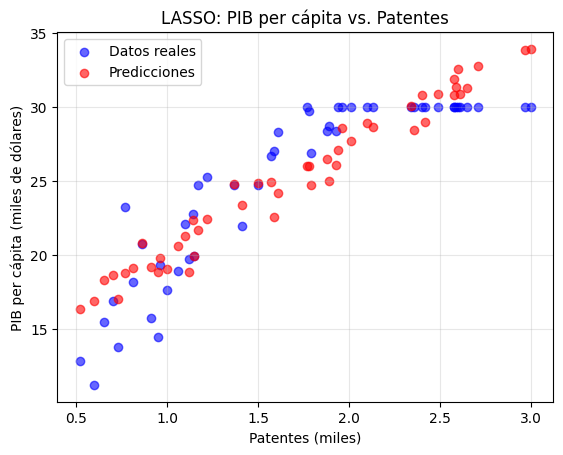

In [9]:
# Visualizar (para Patentes)

plt.scatter(X['Patentes'], y, color='blue', alpha=0.6, label='Datos reales')
plt.scatter(X['Patentes'], y_pred, color='red', alpha=0.6, label='Predicciones')
plt.title('LASSO: PIB per cápita vs. Patentes')
plt.xlabel('Patentes (miles)')
plt.ylabel('PIB per cápita (miles de dólares)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Ejemplo: Ridge con scikit-learn

El proceso para implementar una regresión Ridge es casi idéntico al de Lasso. Utilizaremos los mismos datos para poder comparar directamente el efecto de la penalización L2 (Ridge) con la L1 (Lasso).

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np


np.random.seed(42)


# 1. Generación y Preparación de Datos

n = 50
años = list(range(1975, 2025))

patentes = 0.5 + 0.05 * np.arange(n) + np.random.normal(0, 0.2, n)
patentes = np.round(np.clip(patentes, 0.5, 3.0), 2)

inversion_id = 100 + 5 * np.arange(n) + np.random.normal(0, 20, n)
inversion_id = np.round(np.clip(inversion_id, 100, 400), 2)

pib_base = 10 + 0.4 * np.arange(n)
pib_noise = np.random.normal(0, 1.5, n)
pib_per_capita = pib_base + 2 * patentes + 0.02 * inversion_id + pib_noise
pib_per_capita = np.round(np.clip(pib_per_capita, 10, 30), 2)


# Crear DataFrame

data = pd.DataFrame({ 'Año': años, 'PIB_per_capita': pib_per_capita, 'Patentes': patentes, 'Inversion_ID': inversion_id })


# Variables

X = data[['Patentes', 'Inversion_ID']]
y = data['PIB_per_capita']


# 2. Estandarización de las Variables

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 3. Creación y Entrenamiento del Modelo Ridge

model_ridge = Ridge(alpha=1.0) # alpha controla la penalización
model_ridge.fit(X_scaled, y)


# Predicciones

y_pred = model_ridge.predict(X_scaled)
print(y_pred)


[16.78447708 16.25961029 16.99047158 18.79173069 18.25688352 18.54537261
 18.85056046 19.0262152  19.0422989  20.59237322 19.15415312 19.74156898
 19.89244311 18.69201298 20.72311738 22.30115735 21.265926   23.35302877
 22.39360718 21.64417757 24.75768749 24.83343857 24.20919932 24.78147122
 22.55482523 25.98913569 24.92417279 26.07363246 26.03915117 25.03041452
 26.53055872 29.03857529 28.96770276 27.08241942 28.51371688 27.71890416
 30.13574752 28.55728532 28.68571254 30.92248981 31.35269196 31.96211573
 30.88164379 31.39145883 30.87129986 30.97730532 32.85381629 34.02663593
 33.91766341 32.63794201]


En el código anterior, para la generación de los datos y la estandarización se siguen los mismos pasos que en el ejemplo anterior, posteriormente importamos la clase “Ridge” (from sklearn.linear_model import Ridge). Posteriormente utilizamos “model_ridge = Ridge(alpha=1.0)”, donde creamos una instancia del modelo Ridge. El hiperparámetro alpha sigue controlando la fuerza de la penalización, pero en este caso, de la penalización L2 (cuadrática). Un alpha más grande significa una mayor "reducción" de los coeficientes. El entrenamiento es igual, usando los datos estandarizados (model_ridge.fit(X_scaled, y)).   

El siguiente código realiza la evaluación, el punto más interesante es comparar los coeficientes obtenidos con los del modelo Lasso. Mientras que Lasso podría haber llevado uno de los coeficientes a un valor muy cercano a cero, Ridge tomará un enfoque diferente.

In [11]:
# Evaluación

print("Resultados de Ridge:")
print(f"Intercepto: {model_ridge.intercept_:.2f}")
print(f"Coeficientes: {np.round(model_ridge.coef_, 2)}")
print(f"R^2 Score: {r2_score(y, y_pred):.4f}")
print(f"Error cuadrático medio: {mean_squared_error(y, y_pred):.4f}")

Resultados de Ridge:
Intercepto: 24.97
Coeficientes: [2.47 2.75]
R^2 Score: 0.8089
Error cuadrático medio: 6.3738


Por último, el siguiente código genera una gráfica que nos permite comparar visualmente los datos reales con las predicciones generadas por nuestro modelo de regresión (en este caso, el modelo Ridge, aunque la lógica es idéntica para Lasso o OLS)

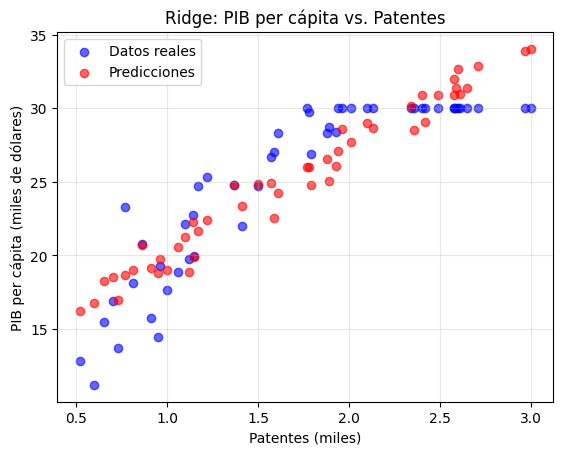

In [12]:
# Visualizar (para Patentes)

plt.scatter(X['Patentes'], y, color='blue', alpha=0.6, label='Datos reales')
plt.scatter(X['Patentes'], y_pred, color='red', alpha=0.6, label='Predicciones')
plt.title('Ridge: PIB per cápita vs. Patentes')
plt.xlabel('Patentes (miles)')
plt.ylabel('PIB per cápita (miles de dólares)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 7.4 Clustering como Modelo No Supervisado
El clustering agrupa datos en clústeres sin necesidad de una variable objetivo, asumiendo que observaciones similares comparten propiedades comunes. Uno de los algoritmos más utilizados es K-Means, que asigna cada observación a uno de “k” clústeres minimizando la varianza dentro de cada grupo.

A continuación, extendemos el ejemplo de la sección 7.3, usando un dataset de 50 años (1975-2024) con PIB per cápita, patentes e inversión en I+D. Aplicamos K-Means para agrupar los años en clústeres según su perfil económico, visualizando los resultados y seleccionando un “k”óptimo.

### Ejemplo: Segmentación de Años por Indicadores Económicos con K-Means

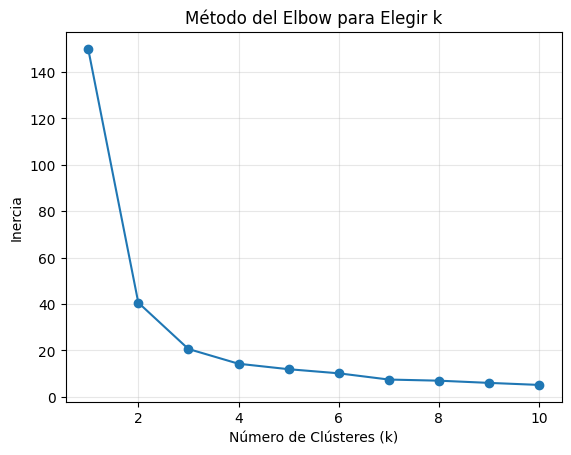

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Generar datos ficticios: PIB per cápita, Patentes, Inversión I+D
np.random.seed(42)


n = 50
años = list(range(1975, 2025))
patentes = 0.5 + 0.05 * np.arange(n) + np.random.normal(0, 0.2, n)
patentes = np.round(np.clip(patentes, 0.5, 3.0), 2)
inversion_id = 100 + 5 * np.arange(n) + np.random.normal(0, 20, n)
inversion_id = np.round(np.clip(inversion_id, 100, 400), 2)
pib_base = 10 + 0.4 * np.arange(n)
pib_noise = np.random.normal(0, 1.5, n)
pib_per_capita = pib_base + 2 * patentes + 0.02 * inversion_id + pib_noise
pib_per_capita = np.round(np.clip(pib_per_capita, 10, 30), 2)


# Crear DataFrame

data = pd.DataFrame({ 'Año': años, 'PIB_per_capita': pib_per_capita, 'Patentes': patentes, 'Inversion_ID': inversion_id })


# Variables para clustering

X = data[['PIB_per_capita', 'Patentes', 'Inversion_ID']]


# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Elegir k óptimo con el método del elbow
inertias = []
k_range = range(1, 11)



for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


# Elbow plot
plt.plot(k_range, inertias, marker='o')
plt.title('Método del Elbow para Elegir k')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.grid(True, alpha=0.3)
plt.show()

Ahora que sabemos que “3” aproximadamente, es el valor óptimo, aplicamos el algoritmo final y visualizamos los grupos que ha encontrado a partir de una gráfica.

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
Name: Cluster, dtype: int32


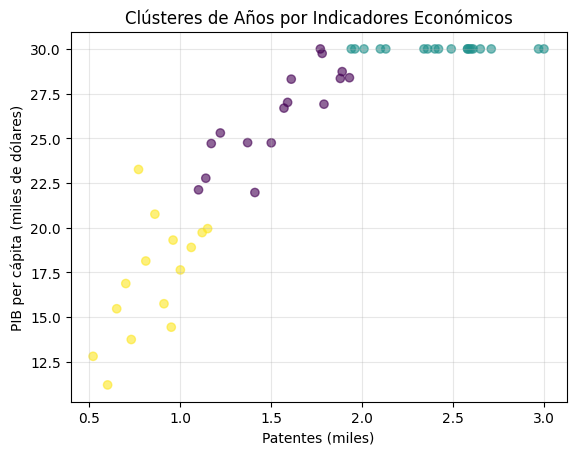

In [16]:
# Aplicar K-Means con k=3 (suponiendo elección tras elbow)
kmeans = KMeans(n_clusters=3, random_state=42)


data['Cluster'] = kmeans.fit_predict(X_scaled)
print(data["Cluster"])


# Visualizar clústeres (PIB vs. Patentes)
plt.scatter(data['Patentes'], data['PIB_per_capita'], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Clústeres de Años por Indicadores Económicos')
plt.xlabel('Patentes (miles)')
plt.ylabel('PIB per cápita (miles de dólares)')
plt.grid(True, alpha=0.3)
plt.show()

Una vez que el algoritmo K-Means ha asignado cada observación (cada año, en nuestro caso) a un clúster, el siguiente paso es entender la naturaleza de estos grupos. La pregunta que queremos responder es: "¿Qué caracteriza a los años del Clúster 0, del Clúster 1 y del Clúster 2?" La forma más directa de hacerlo es calcular la media de las variables originales para cada clúster. Esto nos dará el "perfil promedio" de cada grupo.

In [17]:
# Resumen de clústeres

print("Resumen de Clústeres:")
print(data.groupby('Cluster')[['PIB_per_capita', 'Patentes', 'Inversion_ID']].mean().round(2))

Resumen de Clústeres:
         PIB_per_capita  Patentes  Inversion_ID
Cluster                                        
0                 26.28      1.54        214.13
1                 30.00      2.44        299.73
2                 17.20      0.85        135.20


## 7.5 RandomForest

Random Forest es un método de aprendizaje de ensamble (ensemble learning). La idea es simple pero poderosa: en lugar de confiar en la "opinión" de un solo modelo, se combina la sabiduría de muchos modelos para obtener una predicción final más robusta y precisa. Es la "sabiduría de la multitud" aplicada al Machine Learning

### Ejemplo: Predicción de Ingresos con Random Forest

Usaremos un conjunto de datos similar a los anteriores, pero esta vez introduciremos un paso crucial en el Machine Learning y modelos supervisados: la división de los datos en conjuntos de entrenamiento y prueba.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# 1. Generación de Datos Simulamos una relación que incluye un término no lineal (edad al cuadrado)

np.random.seed(42)


n = 200
edad = np.random.randint(18, 65, n)
educacion = np.random.randint(10, 22, n)
salario_base = 15000 + 1200 * educacion + 500 * edad - 5 * edad**2


# Efecto no lineal de la edad

ruido = np.random.normal(0, 5000, n)
salario = salario_base + ruido


# Genera el DataFrame

data = pd.DataFrame({
    'Salario': salario,
    'Edad': edad,
    'Educacion': educacion

})


# 2. Preparación de Variables y División de Datos

X = data[['Edad', 'Educacion']]
y = data['Salario']


# Dividimos los datos: 80% para entrenamiento, 20% para prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 3. Creación del Modelo Random Forest

# n_estimators es el número de árboles en el bosque

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
rf_model.fit(X_train, y_train)


# 4. Realización de Predicciones y Evaluación

# Hacemos predicciones sobre el conjunto de prueba (datos no vistos)

y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print(f"Coeficiente de Determinación (R²): {r2:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")



# 5. Interpretación: Importancia de las Variables

importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Variable': feature_names, 'Importancia': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)


print("\n--- Importancia de las Variables ---")
print(feature_importance_df)

Coeficiente de Determinación (R²): 0.5055
Raíz del Error Cuadrático Medio (RMSE): 4838.2682

--- Importancia de las Variables ---
    Variable  Importancia
1  Educacion     0.560741
0       Edad     0.439259
